<a href="https://colab.research.google.com/github/HBocaccio/NumLabIMC/blob/main/nb01_Raices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al modelado continuo** (*a.k.a.* **Ecuaciones de la física matemática**)
## Laboratorio numérico 2024

Bienvenidos al laboratorio numérico de la materia *Introducción al modelado continuo*, también conocida como *Ecuaciones de la física matemática*. En este, vamos a ver métodos numéricos para resolver distintos tipos de problemas de manera general, y su relación y aplicación a problemas específicos de la materia, de manera tal de complementar los contenidos de la cursada teórico-práctica.


# Motivación de este colab
<!-- $$\require{amsmath}$$ -->

Recordemos que estamos estudiando **sistemas dinámicos**, con reglas representadas por **ecuaciones diferenciales ordinarias (ODEs)** que describen la evolución temporal de una variable.

En este marco, es importante recordar:
* Nos concentraremos principalmente en **sistemas autónomos**, por lo que las variables no dependen explícitamente del tiempo y su evolución se define a partir de la ecuación $\dot{x}=dx/dt=f(x)$
* $f(x)$ es lo que llamamos un **campo vector**
* Definimos como **punto fijo ($x^{*}$)** aquel para el cual se cumple que $\dot{x}=f(x)=0$
* De esta manera, si la condición inicial es $x(0)=x^{*}$, la única evolución temporal posible sería permanecer en ese punto fijo $\forall t > 0$
* Los **puntos fijos** separan regiones en los que el **campo vector** tiene distinto signo
* El signo del campo vector define la **dirección del flujo**:
    * Si $f(x) > 0$, entonces $\dot{x} > 0$, por lo que $x$ crece.
    * Si $f(x) < 0$, entonces $\dot{x} < 0$, por lo que $x$ decrece.

Entonces, los puntos fijos $x^{*}$, son las raíces del campo vector (donde el campo vector se hace cero) de la forma $\dot{x}=f(x)=0$. Esto motiva a que estudiemos distintos **métodos numéricos para el cálculo de raíces** de funciones. Pero antes, vamos a hacer una breve introducción acerca de cómo podemos empezar a abordar los temas de la materia usando Python y librerías de Pyhton, como repaso.

*Observación: Se trata de un **repaso** de cómo cargar paquetes, manejar variables, graficar, definir funciones, el uso de condicionales y loops, y otras cosas básicas de Python, en el marco de temas de la materia. Si este repaso les resulta trivial porque acostumbran manejar este lenguaje de programación, **hacemos una mirada superficial de esta sección y pasamos a la siguiente**.*


## Campo vector y puntos fijos

Supongamos que tenemos el sistema dinámico

$\dot{x}=f(x)=2x-4$

In [ ]:
# # # Cargamos paquetes estándar para empezar a trabajar
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy as sp

In [ ]:
# # # Definimos la función campovectorlineal para el sistema dinámico
def campovectorlineal(x):
    return 2*x-4

In [ ]:
# # # Definimos un dominio en el cual inspeccionamos el campo vector
# # # Acá pueden probar distintos rangos de valores discretos
x = np.arange(-6, 6, 0.05)
y = campovectorlineal(x)

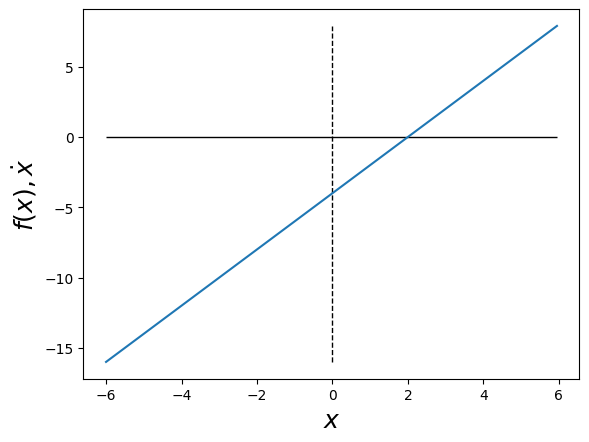

In [ ]:
# # # Graficamos el campo vecto en ese dominio
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
plt.show()

Para el caso de un campo vector descrito por una función lineal, sabemos que el comportamiento será monótono (creciente o decreciente dependiendo de la pendiente), y tendrá una única raíz. La raíz del campo vector será el punto fijo del sistema. Debido al comportamiento monótono, la función evaluada en todos los valores menores al punto fijo tendrá un signo, y en todos los valores mayores al punto fijo tendrá otro signo. El ordenamiento de las regiones de cada signo va a depender de la pendiente de la función lineal.

Podríamos estimar a mano la posición de la raíz teniendo en cuenta el cambio de signo de la función

In [ ]:
if y[0] < 0:
    xfijo = x[y < 0][-1] + (x[y > 0][0] - x[y < 0][-1])/2
elif y[0] > 0:
    xfijo = x[y > 0][-1] + (x[y < 0][0] - x[y > 0][-1])/2

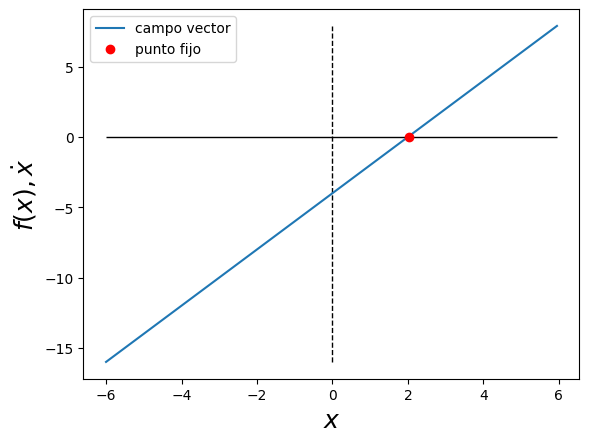

In [ ]:
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y, '-', label='campo vector')
plt.plot(xfijo, 0, marker='o', ls='', c='r', label='punto fijo')
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
plt.legend()
plt.show()

## Estabilidad de puntos fijos


Supongamos que tenemos el sistema dinámico

$\dot{x}=f(x)=x-x^{3}$

In [ ]:
# # # Definimos la función campovector para el sistema dinámico
def campovector(x):
    return x-x**3

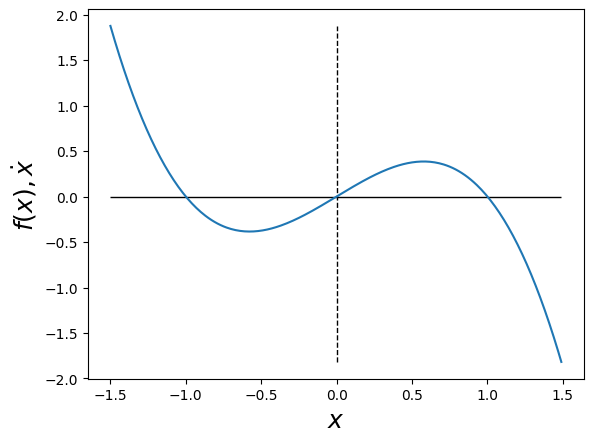

In [ ]:
# # # Definimos el dominio, evaluamos el campo vector, y graficamos
# # # Podemos probar con distintos dominios para ver el comportamiento general del campo vector
x = np.arange(-1.5, 1.5, 0.01)
y = campovector(x)
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
plt.show()

Vamos a considerar este ejemplo como introductorio e ilustrativo del uso de Python a temas de la materia, por lo que vamos a obtener los puntos fijos de manera analítica.

Reescribir el campo vector de la siguiente manera, de donde se deduce que los puntos fijos son 0, 1, y -1:

$\dot{x}=f(x)=x(1-x^{2})=x(x-1)(x+1)$

Para estudiar la estabilidad de estos puntos fijos podemos evaluar la función que describe el campo vector antes y después del punto fijo en un entorno, y de acuerdo al signo que nos describe el flujo podemos determinar su estabilidad.

Otra forma, más sistemática, sería derivando el campo vector y estudiando su signo cuando se evalúa en el punto fijo. Notar que esta descripción en definitiva me describe lo mismo, el flujo en un entorno del punto fijo.

Podemos obtener analíticamente la derivada del campo vector, lo cual daría la expresión:

$f'(x)=1-3x^{2}$


In [ ]:
# # # Hacemos una lista con los puntos fijos obtenidos a mano
puntosfijos = [-1, 0, 1]
# # # Definimos la función que describe la derivada del campo vector
def campovectorprima(x):
    return 1-3*x**2

In [ ]:
# # # Definimos nuevas variables que nos darán información de la pendiente en un entorno del punto fijo,
# # # y del signo de la derivada del campo vector evaluada en el punto fijo.
# # # En este caso, elegimos por convención que la variable estabilidad sea 1 (0) cuando la derivada es menor (mayor) a cero
pendientes = []
estabilidad = []
for p in puntosfijos:
    pendientes.append(campovectorprima(p))
    estabilidad.append(int(campovectorprima(p) < 0))
ordenadas = -np.array(pendientes)*np.array(puntosfijos)

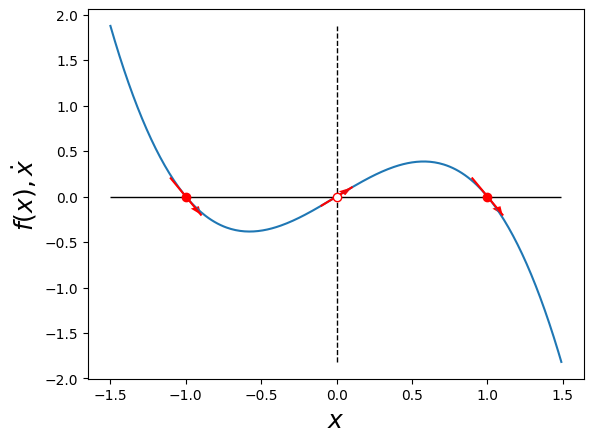

In [ ]:
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
for p in np.arange(len(puntosfijos)):
    epsilon = 0.1
    n = 10
    x_tmp = np.linspace(puntosfijos[p]-epsilon, puntosfijos[p]+epsilon, n)
    y_tmp = pendientes[p]*x_tmp+ordenadas[p]
    plt.plot(x_tmp, y_tmp, 'r')
    plt.arrow(x_tmp[-2], y_tmp[-2], x_tmp[-1]-x_tmp[-2], y_tmp[-1]-y_tmp[-2],
              shape='full', color='r', lw=0, length_includes_head=True, head_width=.06)
    plt.plot(puntosfijos[p], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[p]], markeredgecolor=markerecolors[estabilidad[p]])
plt.show()

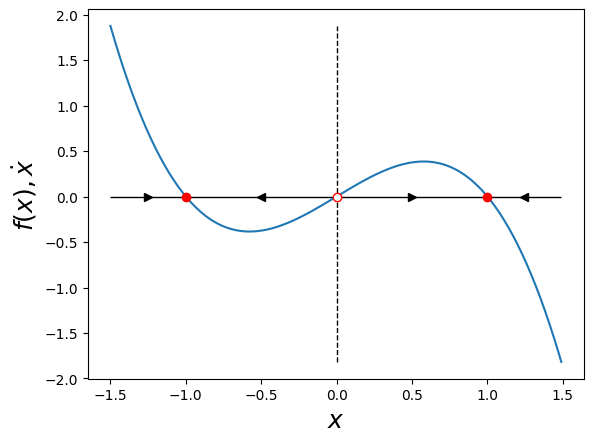

In [ ]:
markerfcolors = ['w', 'r']
markerecolors = ['r', 'r']
xmarkerstyle = ['<', '>']
plt.vlines(0, ymin=y.min(), ymax=y.max(), colors='k', ls='--', lw=1)
plt.hlines(0, xmin=x.min(), xmax=x.max(), colors='k', ls='-', lw=1)
plt.plot(x, y)

for p in np.arange(len(puntosfijos)):
    puntosfijos_sorted = np.sort(puntosfijos)
    if puntosfijos_sorted[p] == puntosfijos_sorted.min():
        x_markers_tmp = [x[0]+(puntosfijos_sorted[p]-x[0])/2]
    elif puntosfijos_sorted[p] == puntosfijos_sorted.max():
        x_markers_tmp = [x[-1]-(x[-1]-puntosfijos[p])/2]
    else:
        x_markers_tmp = [puntosfijos_sorted[p]-(puntosfijos_sorted[p]-puntosfijos_sorted[p-1])/2,
                        puntosfijos_sorted[p]+(puntosfijos_sorted[p+1]-puntosfijos_sorted[p])/2]
    plt.plot(puntosfijos[p], 0, marker='o',
             markerfacecolor=markerfcolors[estabilidad[p]], markeredgecolor=markerecolors[estabilidad[p]])
    for i in np.arange(len(x_markers_tmp)):
        plt.plot(x_markers_tmp[i], 0, c='k', marker=xmarkerstyle[int(campovector(x_markers_tmp[i]) > 0)])
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$f(x), \dot{x}$', fontsize=18)
plt.show()

# Métodos numéricos para el cálculo de raíces de una función

Para hallar los **puntos fijos**, resulta necesario encontrar los **ceros del campo vector**. Por lo tanto, en esta sección vamos a explorar algunos métodos numéricos para el **cálculo de raíces** de funciones.

## Método de bisección

El algoritmo más simple para encontrar raíces es el [método de bisección](https://en.wikipedia.org/wiki/Bisection_method). El algoritmo se aplica a cualquier función continua $f(x)$ en un intervalo $[a,b]$ donde el valor de la función $f(x)$ cambia de signo de $a$ a $b$. La idea es simple: dividir el intervalo en dos, debe existir una solución dentro de un subintervalo, seleccionar el subintervalo donde cambia el signo de $f(x)$ y repetir.

El procedimiento del método de bisección es el siguiente:
1. Elija un intervalo inicial $[a_0,b_0]$ tal que $f(a_0)f(b_0) < 0$
2. Calcule $f(c_0)$ donde $c_0 = (a_0+b_0)/2$ es el punto medio
3. Determine el siguiente subintervalo $[a_1,b_1]$:
  1. Si $f(a_0)f(c_0) < 0$, entonces sea $[a_1,b_1]$ el siguiente intervalo con $a_1=a_0$ y $b_1=c_0$
  2. Si $f(b_0)f(c_0) < 0$, entonces sea $[a_1,b_1]$ el siguiente intervalo con $a_1=c_0$ y $b_1=b_0$
4. Repita (2) y (3) hasta un criterio de corte que puede ser: que el número de iteraciones N llegue a un número de iteraciones máximo predefinido $N_max$; que el intervalo $[a_N,b_N]$ alcance una longitud menor a una tolerancia $ϵ$ predeterminada $|b_N-a_N|<ϵ$; algún otro criterio
5. Devuelva el valor del punto medio $c_N=(a_N+b_N)/2$.

![raices_biseccion](https://raw.githubusercontent.com/HBocaccio/NumLabIMC/main/Colabs/images/1.raices_biseccion.png)

El <a href="https://en.wikipedia.org/wiki/Intermediate_value_theorem">Teorema del valor intermedio</a> garantiza una solución de la ecuación $f(x)=0$ en el intervalo $[a,b]$ siempre que $f(x)$ sea continua en $[a,b]$ y $f(a)f(b) < 0$. Es decir, la función cambia de signo en el intervalo y, por lo tanto, debe ser igual a 0 en algún punto del intervalo $[a,b]$.


### Ejercicio 1:

Escriba una función llamada `biseccion` que tome 4 parámetros de entrada `f`, `a`, `b` y `N` y devuelva la aproximación de una solución de $f(x)=0$ dada por $N$ iteraciones del método de bisección.

[Opcional extra] Si $f(a_n)f(b_n) \geq 0$ en cualquier punto de la iteración (causado ya sea por un intervalo inicial incorrecto o un error de redondeo en los cálculos), entonces imprima `"El método de bisección falla"` y devuelva `None`.

In [ ]:
# # # COMPLETAR

### Ejercicio 2:

Ahora vamos a evaluar el código de nuestro método de bisección en la función `campovector` que definimos previamente ($f(x)=x-x^{3}$).

Para pensar y probar:
1. Cómo definiría las condiciones iniciales para encontrar cada punto fijo?
2. Bajo que relación de las condiciones iniciales se puede encontrar la solución exacta con muy pocas iteraciones? [Hint: piense en cómo estimo mi solución probable en cada paso de la iteración]
3. Elija una raíz conocida, brinde las condiciones iniciales adecuadas para encontrarla, y muestre como se va aproximando la estimación a medida que aumento el número de iteraciones. Haga el gráfico de solución en función del N.
4. Qué sucede cuando pongo como condiciones iniciales [-1.5, 0.5]? Qué es lo que está pasando?
5. Qué sucede cuando pongo como condiciones iniciales [-1.7, 1.5]? Qué es lo que está pasando?


In [ ]:
# # # COMPLETAR

## Método de Newton-Raphson

El [método de Newton](https://en.wikipedia.org/wiki/Newton%27s_method) es un método de búsqueda de raíces que utiliza una aproximación lineal del desarrollo de Taylor. En particular, suponemos una solución $x^{*}$ de la ecuación $f(x)=0$, calculamos la aproximación lineal de $f(x)$ en $x^{*}$ y luego encontramos la intersección con el eje x de la aproximación lineal.

Sea $f(x)$ una función diferenciable. Si $x_0$ está cerca de una solución de $f(x)=0$, entonces podemos aproximar $f(x)$ por la recta tangente en $x_0$ y calcular la intersección con el eje x de la recta tangente. La ecuación de la recta tangente en $x_0$ es

$$
y = f'(x_0)(x - x_0) + f(x_0)
$$

La intersección con el eje x es la solución $x_1$ de la ecuación

$$
0 = f'(x_0)(x_1 - x_0) + f(x_0)
$$

y resolvemos para $x_1$

$$
x_1 = x_0 - \frac{f(x_0)}{f'(x_0)}
$$

Si implementamos este procedimiento repetidamente, obtenemos una secuencia dada por la fórmula recursiva

$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$

Al repetir el proceso, se crea un método iterativo que (potencialmente) converge a una solución de la ecuación $f(x)=0$. El proceso iterativo se repite hasta algún criterio de corte de manera similar al método de bisección, que puede ser: un número máximo de iteraciones; que el valor absoluto de la función evaluada en el último punto sea menor a una cierta tolerancia $ϵ$; algún otro criterio.

![raices_newton](https://raw.githubusercontent.com/HBocaccio/NumLabIMC/main/Colabs/images/1.raices_newton.png)

De la definición del método se destaca que el método puede no siempre converger. Particularmente, el método presentaría problemas cuando la derivada de la función evaluada en un punto, que resulta de algún paso de la iteración, es cero.

Escribamos una función llamada `newton` que toma 5 parámetros de entrada `f`, `Df`, `x0`, `epsilon` y `max_iter` y devuelve una aproximación de una solución de $f(x)=0$ por el método de Newton. La función puede terminar de 3 maneras:

1. Si `abs(f(xn)) < epsilon`, el algoritmo ha encontrado una solución aproximada y devuelve `xn`.
2. Si `f'(xn) == 0`, el algoritmo se detiene y devuelve `None`.
3. Si el número de iteraciones excede `max_iter`, el algoritmo se detiene y devuelve `None`.

In [ ]:
def newton(f, Df, x0, epsilon, max_iter):
    xn = x0
    for n in range(0, max_iter):
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print('Se encontró solución luego de ',n,' iteraciones')
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print('Problema de derivada nula')
            return None
        xn = xn - fxn/Dfxn
    print('Se excedió el número de iteraciones máximo')
    return None

Evaluemos el método en el problema del **Ejercicio 2**. Para ello usamos la función `campovector` previamente definida ($f(x)=x-x^{3}$) y su derivada `campovectorprima` ($f'(x)=1-3x^{2}$).


Veamos de buscar alguna raíz para alguna condición inicial y criterios de corte. Cómo pareciera ser la velocidad de convergencia respecto del método de bisección?

In [ ]:
newton(campovector, campovectorprima, 1.5, 0.0000001, 10)

Se encontró solución luego de  5  iteraciones


1.000000000015063

Veamos que pasa cuando definimos como condición inicial justo el punto en el que la derivada se anula

In [ ]:
newton(campovector, campovectorprima, 1/np.sqrt(3), 0.0000001, 10)

Se excedió el número de iteraciones máximo


Por qué no me da como respuesta que la derivada se anula?

In [ ]:
campovectorprima(1/np.sqrt(3))

-2.220446049250313e-16

Qué pasa si le doy más iteraciones?

In [ ]:
newton(campovector, campovectorprima, 1/np.sqrt(3), 0.0000001, 100)

Se encontró solución luego de  92  iteraciones


1.0000000000030183

**Cómo elijo las condiciones iniciales cuando no conozco las raíces?**

En muchos casos no conozco las raíces reales, por lo que la elección de condiciones iniciales es todo un problema. Inclusive, puedo no saber cuántas raíces tiene la función.

Una buena primera aproximación y muy informativa es lo que hicimos previamente, graficar la función en un dominio de valores de x. No obstante, una idea a segundo orden puede ser elegir valores aleatorios de condiciones iniciales en ese dominio. Esto es particularmente simple para el método de Newton-Raphson.

In [ ]:
# x.shape
np.random.seed(0) # Por repetibilidad
condiciones_iniciales = np.random.choice(x, 20)
soluciones = []
for c in condiciones_iniciales:
    soluciones.append(newton(campovector, campovectorprima, c, 0.0000001, 100))

Se encontró solución luego de  3  iteraciones
Se encontró solución luego de  3  iteraciones
Se encontró solución luego de  3  iteraciones
Se encontró solución luego de  4  iteraciones
Se encontró solución luego de  2  iteraciones
Se encontró solución luego de  13  iteraciones
Se encontró solución luego de  5  iteraciones
Se encontró solución luego de  9  iteraciones
Se encontró solución luego de  4  iteraciones
Se encontró solución luego de  4  iteraciones
Se encontró solución luego de  5  iteraciones
Se encontró solución luego de  8  iteraciones
Se encontró solución luego de  5  iteraciones
Se encontró solución luego de  8  iteraciones
Se encontró solución luego de  5  iteraciones
Se encontró solución luego de  4  iteraciones
Se encontró solución luego de  8  iteraciones
Se encontró solución luego de  3  iteraciones
Se encontró solución luego de  8  iteraciones
Se encontró solución luego de  3  iteraciones


Veamos las distintas soluciones obtenidas. Se puede ver que con pocas elecciones aleatorias de condiciones iniciales encuentro todas las soluciones. Pero eso depende de la cantidad de soluciones posibles y del dominio elegido.

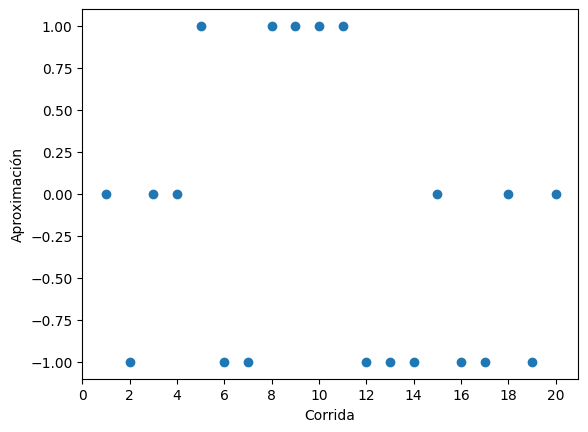

In [ ]:
plt.plot(np.arange(len(soluciones))+1, soluciones, 'o')
plt.xlabel('Corrida')
plt.ylabel('Aproximación')
plt.xticks(np.arange(0, len(soluciones)+1, 2))
plt.show()

In [ ]:
np.unique(np.array(soluciones).round(2))

array([-1., -0.,  1.])

Veamos cómo depende la solución obtenida de la condición inicial elegida

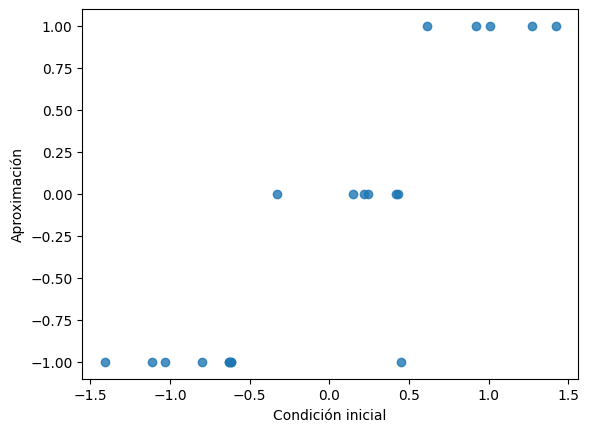

In [ ]:
plt.plot(condiciones_iniciales, soluciones, 'o', alpha=0.8)
plt.xlabel('Condición inicial')
plt.ylabel('Aproximación')
plt.show()

Se puede observar que en muchos casos hay regiones de condiciones iniciales que me llevan a converger a una cierta raíz. Sin embargo, en algunos casos puede pasar que la derivada de la función haga que para una cierta condición inicial en una cierta región me pase a otra región y termine convergiendo en otra raíz

#### Ejercicio 3:

Resuelva el problema de búsqueda de la raíz para la función `campovectorlineal` ($f(x)=2x-4$) definida al principio del Colab, usando el método de Newton-Raphson para la condición inicial $x_0=1$. Tenga en cuenta que hay que definir la función `campovectorlinealprima` ($f'(x)=2$).
1. Cuántas iteraciones necesité?
2. Qué pasaría con otra condición inicial?

In [ ]:
# # # COMPLETAR

Cuántas iteraciones del método de bisección necesitaría para llegar a la misma solución usando como condición inicial el intervalo [1, 4]?

In [ ]:
N = np.arange(20)
aprox = []
for n in N:
    aprox.append(biseccion(campovectorlineal, 1, 4, n))

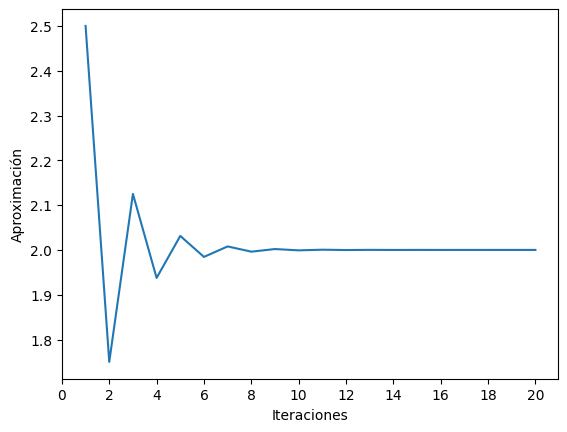

In [ ]:
plt.plot(N+1, aprox)
plt.xlabel('Iteraciones')
plt.ylabel('Aproximación')
plt.xticks(np.arange(0, len(N)+1, 2))
plt.show()

Más allá de este caso particular, en el que la función es lineal y por ende el método de Newton-Raphson converge de manera trivial a la solución en 1 iteración (la recta tangente en todo punto de la recta es la misma recta), en general este método es mucho más rápido (cuando converge) que el método de bisección.

## Método de la secante

El [método de la secante](https://en.wikipedia.org/wiki/Secant_method) es muy similar al método de bisección, excepto que en lugar de dividir cada intervalo eligiendo el punto medio, el método de la secante divide cada intervalo por la línea secante que conecta los puntos finales. El método de la secante siempre converge a una raíz de $f(x)=0$ siempre que $f(x)$ sea continua en $[a,b]$ y $f(a)f(b)<0$.

Sea $f(x)$ una función continua en un intervalo cerrado $[a,b]$ tal que $f(a)f(b) < 0$. Una solución de la ecuación $f(x) = 0$ para $x \in [a,b]$ está garantizada por el [Teorema del valor intermedio](https://en.wikipedia.org/wiki/Intermediate_value_theorem). Considere la línea que conecta los valores de los puntos finales $(a,f(a))$ y $(b,f(b))$. La línea que une estos dos puntos se llama línea secante y se expresa mediante la fórmula

$$
y = \frac{f(b) - f(a)}{b - a}(x - a) + f(a)
$$

El punto donde la línea secante cruza el eje $x$ es

$$
0 = \frac{f(b) - f(a)}{b - a}(x - a) + f(a)
$$

que calculamos para $x$

$$
x = a - f(a)\frac{b - a}{f(b) - f(a)}
$$

El procedimiento del método de la secante es casi idéntico al del método de bisección. La única diferencia es cómo dividimos cada subintervalo.
1. Elija un intervalo inicial $[a_0,b_0]$ tal que $f(a_0)f(b_0) < 0$.
2. Calcule $f(x_0)$ donde $x_0$ está dado por la recta secante.
$$
x_0 = a_0 - f(a_0)\frac{b_0 - a_0}{f(b_0) - f(a_0)}
$$
3. Determine el siguiente subintervalo $[a_1,b_1]$:
1. Si $f(a_0)f(x_0) < 0$, entonces sea $[a_1,b_1]$ el siguiente intervalo con $a_1=a_0$ y $b_1=x_0$.
2. Si $f(b_0)f(x_0) < 0$, entonces sea $[a_1,b_1]$ el siguiente intervalo con $a_1=x_0$ y $b_1=b_0$.
4. Repita (2) y (3) hasta que el intervalo $[a_N,b_N]$ alcance una longitud predeterminada.
5. Devuelva el valor $x_N$, la intersección con el eje x del $N$ésimo subintervalo.

El [Teorema del valor intermedio](https://en.wikipedia.org/wiki/Intermediate_value_theorem) garantiza una solución de la ecuación $f(x)=0$ en el intervalo $[a,b]$ siempre que $f(x)$ sea continua en $[a,b]$ y $f(a)f(b) < 0$. Es decir, la función cambia de signo en el intervalo y, por lo tanto, debe ser igual a 0 en algún punto del intervalo $[a,b]$.

![raices_secante](https://raw.githubusercontent.com/HBocaccio/NumLabIMC/main/Colabs/images/1.raices_secante.png)

Escribamos una función llamada `secante` que tome 4 parámetros de entrada `f`, `a`, `b` y `N` y devuelva la aproximación de una solución de $f(x)=0$ dada por $N$ iteraciones del método de la secante. Si $f(a_n)f(b_n) \geq 0$ en cualquier punto de la iteración (causado ya sea por un intervalo inicial incorrecto o un error de redondeo en los cálculos), entonces imprima `"El método de la secante falla"` y devuelva `Ninguno`.

In [ ]:
def secante(f, a, b, N):
    if f(a)*f(b) >= 0:
        print("El método de la secante falla")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        c_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_c_n = f(c_n)
        if f(a_n)*f_c_n < 0:
            a_n = a_n
            b_n = c_n
        elif f(b_n)*f_c_n < 0:
            a_n = c_n
            b_n = b_n
        elif f_c_n == 0:
            print("Se encontró la solución exacta")
            return c_n
        else:
            print("El método de la secante falla")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

Evaluemos el método en el problema del **Ejercicio 2**. Para ello usamos la función `campovector` previamente definida ($f(x)=x-x^{3}$).

In [ ]:
secante(campovector, -1.7, -0.5, 100)

Se encontró la solución exacta


-1.0

## Uso de scipy

También podemos usar el paquete scipy que tiene funciones para encontrar la raíz usando el método de bisección con `scipy.optimize.bisect`, el método de Newton-Raphson con `scipy.optimize.newton` cuando se le da como variable de entrada la derivada en `fprime`, el método de la secante con `scipy.optimize.newton` cuando en la variable de entrada `fprime` ponemos `None`, entre otros.

In [ ]:
import scipy.optimize as optimize

In [ ]:
# # # Bisección
optimize.bisect(campovector, a=-1.7, b=-0.5)

-1.000000000000364

In [ ]:
# # # Newton-Raphson
optimize.newton(campovector, fprime=campovectorprima, x0=0.5)

-1.0

In [ ]:
# # # Secante
optimize.newton(campovector, fprime=None, x0=0.5)

-1.0

## Comparación de métodos

Cuando converge, el método de Newton-Raphson suele hacerlo muy rápidamente y esta es su principal ventaja. Sin embargo, no se garantiza la convergencia del método y esto es obviamente una gran desventaja, especialmente en comparación con los métodos de bisección y de la secante, para los cuales sí se garantiza la convergencia a una solución (siempre que comiencen con un intervalo que contenga una raíz).

El método de Newton-Raphson también requiere calcular valores de la derivada de la función en cuestión. Esto es potencialmente una desventaja si la derivada es difícil de calcular. En contraste, los métodos de bisección y de la secante no requieren del cálculo de la derivada.

Los criterios de corte del método de Newton-Raphson suelen diferir de los de los métodos de bisección y de la secante. En esos métodos, sabemos lo cerca que estamos de una solución porque estamos calculando intervalos que contienen una solución. En el método de Newton-Raphson, no sabemos cuán cerca estamos de una solución. Todo lo que podemos calcular es el valor $f(x)$ y, por lo tanto, implementamos un criterio de corte basado en $f(x)$. Además, no hay garantía de que el método de Newthon-Raphson converja a una solución y debemos establecer un número máximo de iteraciones para que nuestra implementación finalice si no encontramos una solución.

**Ejemplo divergente de Newton-Raphson**

El método de Newton-Raphson puede diverger en ciertos casos. Por ejemplo, si la línea tangente en la raíz es vertical como en $f(x)=x^{1/3}$. Tenga en cuenta que los métodos de bisección y secante convergerían en este caso.

In [ ]:
# # # Acá incorporamos otra forma de definir funciones (handle of function)
f = lambda x: x**(1/3)
Df = lambda x: (1/3)*x**(-2/3)
approx = newton(f, Df, 0.1, 1e-2, 100)

Se excedió el número de iteraciones máximo


### Ejercicio 4:

Vamos a comparar ahora el tiempo de convergencia de los métodos de bisección, de Newton-Raphson, y de la secante. Para eso hagan varias corridas de cada método en la resolución de la busqueda de la raíz de la función $f(x)=xe^x-1$ en el dominio entre -1 y 1, con inicialización aleatoria, y calculen el tiempo que tarda cada método en cada corrida. Para cada método guarden esos tiempos en una variable, y después comparen entre métodos.

Para el calculo de los tiempos usen el paquete `time`. Una forma de calcular el tiempo de un proceso es la siguiente:

    start = time.time()
    ... acá el proceso
    elapsed = (time.time() - start)




In [ ]:
import time

In [ ]:
# # # COMPLETAR

**Convergencia**

Podemos ver el orden de convergencia de los distintos métodos. Para destacar, el método de bisección se dice que tiene convergencia lineal, Newton-Raphson tiene convergencia cuadrática (por lo que es más rápido), y el método de la secante tiene convergencia superlineal (está entre los dos métodos anteriores).

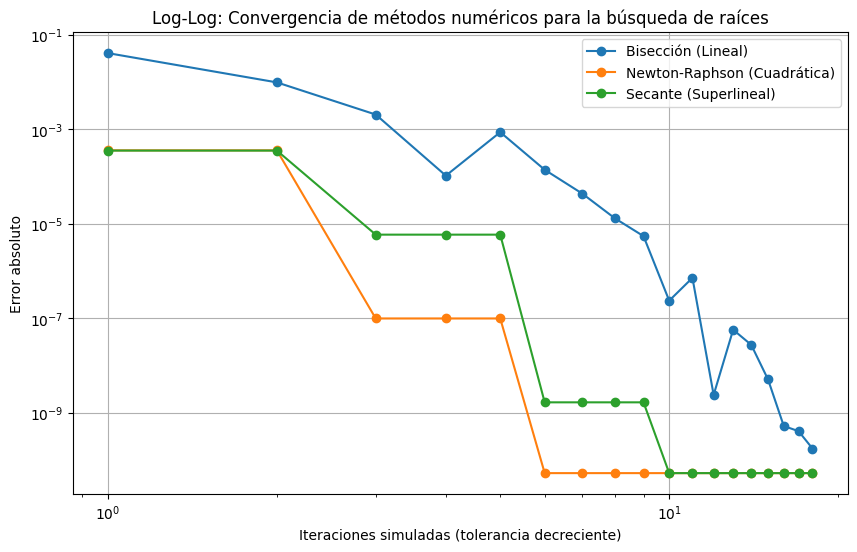

In [ ]:
# Definir una función ejemplo: f(x) = x^3 - x - 2
def f(x):
    return x**3 - x - 2

# Derivada de la función (para Newton-Raphson)
def df(x):
    return 3*x**2 - 1

# Parámetros iniciales
a, b = 1, 2
x0 = 1.5
x1 = 1.6
tol = 1e-10
maxiter = 100

# Almacenar los errores en cada iteración
errors_bisect = []
errors_newton = []
errors_secant = []

# Valor de la raíz verdadera utilizando alta precisión (para referencia)
root_true = optimize.bisect(f, a, b, xtol=tol)

# Simular iteraciones con diferentes tolerancias
for i in np.arange(1, 10, 0.5):
    tol_iter = float(10)**(-i)
    root_bisect = optimize.bisect(f, a, b, xtol=tol_iter, maxiter=maxiter)
    root_newton = optimize.newton(f, x0, fprime=df, tol=tol_iter, maxiter=maxiter)
    root_secant = optimize.newton(f, x0, tol=tol_iter, maxiter=maxiter)

    # Calcular y almacenar los errores
    errors_bisect.append(abs(root_bisect - root_true))
    errors_newton.append(abs(root_newton - root_true))
    errors_secant.append(abs(root_secant - root_true))


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors_bisect) + 1), errors_bisect, label="Bisección (Lineal)", marker='o')
plt.plot(range(1, len(errors_newton) + 1), errors_newton, label="Newton-Raphson (Cuadrática)", marker='o')
plt.plot(range(1, len(errors_secant) + 1), errors_secant, label="Secante (Superlineal)", marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Iteraciones simuladas (tolerancia decreciente)')
plt.ylabel('Error absoluto')
plt.title('Log-Log: Convergencia de métodos numéricos para la búsqueda de raíces')
plt.legend()
plt.grid(True)
plt.show()

# Aplicación a problemas de la guía

Ahora, pueden aplicar estos métodos numéricos para el cálculo de puntos fijos en distintos problemas del principio de la guía (los que son de flujo 1D).

## Ejercicio Tarea

Una aplicación que puede ser interesante es el **Ejercicio 1.e.** de la **Práctica 1**:

Análisis gráfico del flujo de sistemas 1D para la ecuación

$$\dot{x} = e^{x} − \cos{(𝑥)}$$

Definimos las funciones para el campo vector y su derivada

In [ ]:
campovector_1e = lambda x: np.exp(x) - np.cos(x)
campovectorprima_1e = lambda x: np.exp(x) + np.sin(x)

1. Elijan un dominio (tengan en cuenta que el término exponencial se hace muy grande para valores positivos no tan grandes)
2. Grafiquen la exponencial y el menos coseno, y vean las intersecciones
2. Hagan el gráfico del campo vector
3. Busquen los puntos fijos usando distintos métodos y condiciones iniciales

In [ ]:
# # # COMPLETAR